In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score

In [54]:
data_pca = pd.read_csv("./outputs/data_pca_01.csv")

In [55]:
data_pca = data_pca[["0","1","2","3"]]
data_pca

,0,1,2,3
0,1.638548,-2.316269,1.266891,-2.153693
1,0.280055,-1.866923,1.302688,-0.776479
2,-0.149636,-2.433524,0.165711,0.210383
3,-0.124908,-2.584653,0.624249,-0.419475
4,0.509691,-2.652340,0.016879,1.265316
5,-0.080630,-2.346694,0.248327,0.899906
6,1.712343,-2.023573,0.402632,-2.333979
7,1.376256,-2.932480,0.109049,-1.335586
8,0.495624,-3.477197,0.400862,0.451219
9,1.168011,-2.635623,0.848129,-0.007764


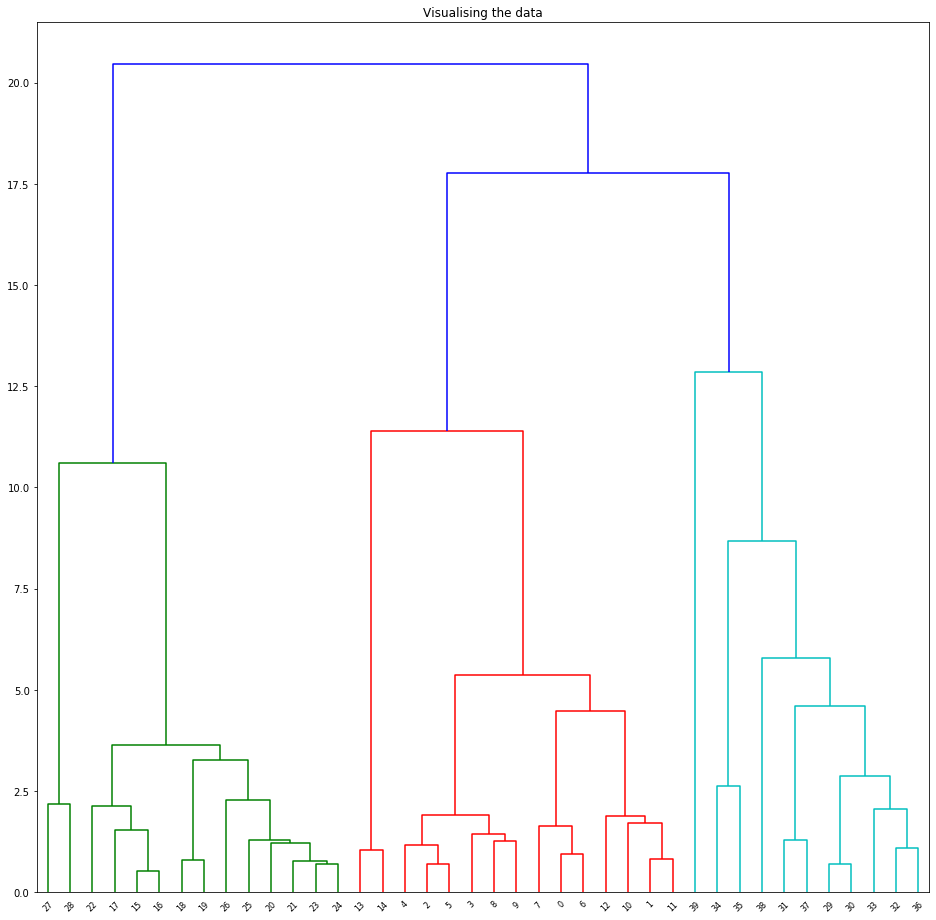

In [56]:
plt.figure(figsize =(16, 16)) 

plt.title('Visualising the data') 

Dendrogram = shc.dendrogram((shc.linkage(data_pca, method ='ward')))

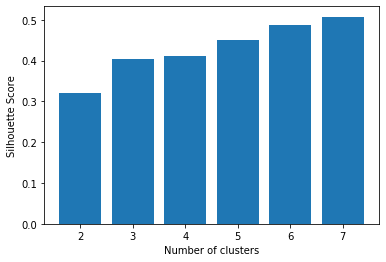

In [57]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(data_pca, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(data_pca))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [58]:
agg = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
agg.fit(data_pca)

AgglomerativeClustering(n_clusters=3)

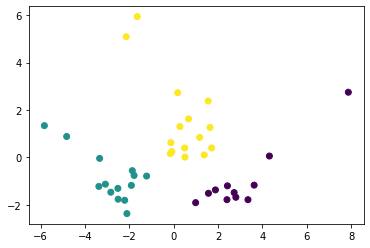

In [59]:
# Visualizing the clustering 
plt.scatter(data_pca["0"], data_pca["2"],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(data_pca)) 
plt.show()

In [60]:
preds = agg.fit_predict(data_pca)

In [61]:
data_pca['preds'] = preds

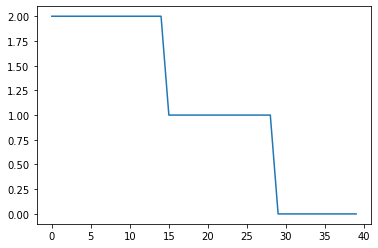

In [62]:
plt.plot(data_pca.index, data_pca['preds'].tolist())

In [63]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(data_pca)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

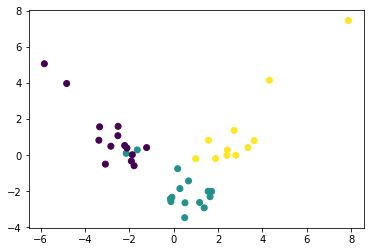

In [64]:
# Visualizing the clustering 
plt.scatter(data_pca["0"], data_pca["1"],  
           c = kmeans.labels_)
plt.show() 

In [65]:
preds = kmeans.fit_predict(data_pca)

In [66]:
data_pca['preds'] = preds

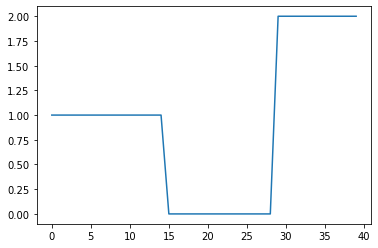

In [67]:
plt.plot(data_pca.index, data_pca['preds'].tolist())